In [1]:
import numpy as np
import pandas as pd

In [2]:
# https://www.statsmodels.org/stable/index.html
import statsmodels.api as sm

In [3]:
spamDf = pd.read_excel("https://www.dropbox.com/scl/fi/v24mmhg5hmefmnv99uqsy/Spam.xlsx?rlkey=iq7exnueq84sy7y2b8ud70mp0&dl=1")
spamDf

,Record,Spam,Recipients,Hyperlinks,Characters
0,1,0,19,1,47
1,2,0,15,1,58
2,3,1,13,11,88
3,4,1,17,11,68
4,5,0,15,1,87
...,...,...,...,...,...
495,496,0,15,2,97
496,497,0,20,5,72
497,498,1,41,11,52
498,499,1,16,11,74


In [4]:
spamDf.size, spamDf.shape

(2500, (500, 5))

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# Split the dataset into training and testing sets
trainSet, testSet = train_test_split(
  spamDf,
  test_size=0.3,
  random_state=1,
  stratify=spamDf['Spam']
)
trainSet.shape, testSet.shape

((350, 5), (150, 5))

In [7]:
# Fit the logistic regression model
features = ['Recipients', 'Hyperlinks', 'Characters']
xTrain = trainSet[features]
yTrain = trainSet['Spam'].astype(int)

In [8]:
spamBasedOnRecipientsHyperlinksCharactersLogitModel = sm.Logit(
  yTrain,
  sm.add_constant(xTrain)
)
spamBasedOnRecipientsHyperlinksCharactersLogitModelFit = spamBasedOnRecipientsHyperlinksCharactersLogitModel.fit()
print(spamBasedOnRecipientsHyperlinksCharactersLogitModelFit.summary())

Optimization terminated successfully.
         Current function value: 0.430522
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   Spam   No. Observations:                  350
Model:                          Logit   Df Residuals:                      346
Method:                           MLE   Df Model:                            3
Date:                Sun, 16 Jun 2024   Pseudo R-squ.:                  0.3784
Time:                        11:42:30   Log-Likelihood:                -150.68
converged:                       True   LL-Null:                       -242.40
Covariance Type:            nonrobust   LLR p-value:                 1.606e-39
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.3440      0.757     -5.741      0.000      -5.827      -2.861
Recipients     0.1071      0.

In [10]:
predict1 = spamBasedOnRecipientsHyperlinksCharactersLogitModelFit.predict(sm.add_constant(testSet[features]))
testSet['predict1'] = predict1
sumTable = pd.DataFrame({'A': testSet['Spam'], 'Prob': testSet['predict1']})
sumTable.to_csv("ROC.csv", index=True)


In [11]:
sumTable1 = pd.DataFrame({'A': testSet['Spam'], 'Prob': testSet['predict1']})

In [12]:
# Make predictions based on probability threshold of 0.5
testSet['predictions'] = (testSet['predict1'] > 0.5).astype(int)
sumTable1['P'] = testSet['predictions']
sumTable1

,A,Prob,P
186,0,0.739633,1
423,0,0.079193,0
369,1,0.712801,1
283,1,0.838428,1
266,1,0.789240,1
...,...,...,...
156,1,0.850576,1
54,0,0.180012,0
322,0,0.376942,0
314,0,0.040472,0


In [13]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve

In [14]:
# Calculate accuracy
accuracy = accuracy_score(sumTable1['A'], sumTable1['P'])
spamBasedOnRecipientsHyperlinksCharactersLogitModelFit.customMetrics = {}
spamBasedOnRecipientsHyperlinksCharactersLogitModelFit.customMetrics['accuracy'] = accuracy
print(f'Accuracy: {spamBasedOnRecipientsHyperlinksCharactersLogitModelFit.customMetrics['accuracy']}')

Accuracy: 0.78


In [15]:
# Calculate recall
recall = recall_score(sumTable1['A'], sumTable1['P'])
spamBasedOnRecipientsHyperlinksCharactersLogitModelFit.customMetrics['recall'] = recall
print(f'Recall: {recall}')

Recall: 0.7532467532467533


In [16]:
# Calculate precision
precision = precision_score(sumTable1['A'], sumTable1['P'])
spamBasedOnRecipientsHyperlinksCharactersLogitModelFit.customMetrics['precision'] = precision
print(f'Precision: {precision}')

Precision: 0.8055555555555556


In [17]:
# Sensitivity and Specificity (Sensitivity is same as recall)
sensitivity = recall
specificity = sum((sumTable1['A'] == 0) & (sumTable1['P'] == 0)) / sum(sumTable1['A'] == 0)
spamBasedOnRecipientsHyperlinksCharactersLogitModelFit.customMetrics['sensitivity'] = sensitivity
spamBasedOnRecipientsHyperlinksCharactersLogitModelFit.customMetrics['specificity'] = specificity
print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')

Sensitivity: 0.7532467532467533
Specificity: 0.8082191780821918


In [18]:
# Calculate F1 Score
f1Score = 2 * (precision * recall) / (precision + recall)
spamBasedOnRecipientsHyperlinksCharactersLogitModelFit.customMetrics['f1Score'] = f1Score
print(f'F1 Score: {f1Score}')

F1 Score: 0.778523489932886


In [19]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(testSet['Spam'], testSet['predict1'])
roc_auc = roc_auc_score(testSet['Spam'], testSet['predict1'])
spamBasedOnRecipientsHyperlinksCharactersLogitModelFit.customMetrics['roc_auc'] = roc_auc
# Calculate AUC
print(f'AUC: {roc_auc}')


AUC: 0.8305461661626046


In [20]:
import matplotlib.pyplot as plt

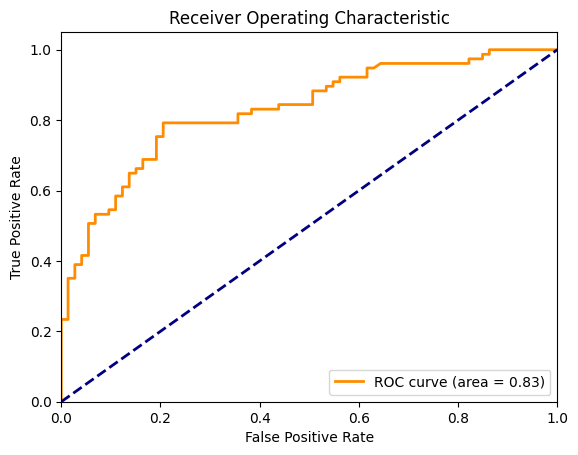

In [21]:

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [22]:
# KFold
from sklearn.model_selection import KFold
# Initialize KFold
# k=2
# k=5
k=10
kf = KFold(n_splits=k, shuffle=True, random_state=55)
spamDf.head()

,Record,Spam,Recipients,Hyperlinks,Characters
0,1,0,19,1,47
1,2,0,15,1,58
2,3,1,13,11,88
3,4,1,17,11,68
4,5,0,15,1,87


In [23]:
check = kf.split(spamDf)
check
experiment = 1
# Loop through each fold
# Initialize variables to store results
accuracies = []

for train_index, val_index in check:
    # Split the data
    trainSet, valSet = spamDf.iloc[train_index], spamDf.iloc[val_index]

    # Fit the model

    trainModel = sm.Logit(
      trainSet["Spam"],
      sm.add_constant(trainSet[['Recipients', 'Hyperlinks', 'Characters']])
    )
    trainModelFit = trainModel.fit()

    # Predict on the validation set
    val_predictions = trainModelFit.predict(sm.add_constant(valSet[['Recipients', 'Hyperlinks', 'Characters']]))
    valSet['val_predictions'] = val_predictions
    valSet['yHatCross'] = valSet['val_predictions'].apply(lambda x: 1 if x > 0.5 else 0)
    valSet['isCrossCorrect'] = valSet.apply(lambda row: 1 if row['Spam'] == row['yHatCross'] else 0, axis=1)
    accuracy = (np.sum(valSet['isCrossCorrect']) / len(valSet['yHatCross'])) * 100
    accuracies.append(accuracy)


    # Print summary for each fold (optional)
    print(f'expr={experiment}')
    experiment = experiment +1
    print(trainModelFit.summary())

Optimization terminated successfully.
         Current function value: 0.460658
         Iterations 6
expr=1
                           Logit Regression Results                           
Dep. Variable:                   Spam   No. Observations:                  450
Model:                          Logit   Df Residuals:                      446
Method:                           MLE   Df Model:                            3
Date:                Sun, 16 Jun 2024   Pseudo R-squ.:                  0.3343
Time:                        11:43:01   Log-Likelihood:                -207.30
converged:                       True   LL-Null:                       -311.38
Covariance Type:            nonrobust   LLR p-value:                 7.258e-45
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0452      0.691     -5.857      0.000      -5.399      -2.691
Recipients     0.1205 

/var/folders/kk/xx0ydj0576xgclh1nd3hdlbr0000gn/T/ipykernel_29033/1702950247.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valSet['val_predictions'] = val_predictions
/var/folders/kk/xx0ydj0576xgclh1nd3hdlbr0000gn/T/ipykernel_29033/1702950247.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valSet['yHatCross'] = valSet['val_predictions'].apply(lambda x: 1 if x > 0.5 else 0)
/var/folders/kk/xx0ydj0576xgclh1nd3hdlbr0000gn/T/ipykernel_29033/1702950247.py:24: SettingWithCopyWarning: 
A value is trying

In [24]:
accuracies, print(f"Average accuracies across all folds: {sum(accuracies) /len(accuracies)}")

Average accuracies across all folds: 78.8


([82.0, 78.0, 82.0, 74.0, 80.0, 78.0, 78.0, 68.0, 80.0, 88.0], None)

In [25]:
spamBasedOnRecipientsHyperlinksCharactersLogitModelFit.customMetrics[f'k-fold{k}'] = {
    "k": k,
    "accuracies": accuracies,
    "accuracyAvg": sum(accuracies) /len(accuracies)
    
}
spamBasedOnRecipientsHyperlinksCharactersLogitModelFit.customMetrics

{'accuracy': 0.78,
 'recall': 0.7532467532467533,
 'precision': 0.8055555555555556,
 'sensitivity': 0.7532467532467533,
 'specificity': 0.8082191780821918,
 'f1Score': 0.778523489932886,
 'roc_auc': 0.8305461661626046,
 'k-fold10': {'k': 10,
  'accuracies': [82.0, 78.0, 82.0, 74.0, 80.0, 78.0, 78.0, 68.0, 80.0, 88.0],
  'accuracyAvg': 78.8}}

In [26]:
def transformer(df):
    df = df.copy()
    df.insert(0, 'const', 1)
    
    return df

In [28]:
from mlModelSaver import MlModelSaver
mlModelSaverInstance = MlModelSaver({
    "baseRelativePath": "..",
    "modelsFolder": "models"
})

loadedModel = mlModelSaverInstance.exportModel(
    spamBasedOnRecipientsHyperlinksCharactersLogitModelFit,
    {
        "modelName": "spamBasedOnRecipientsHyperlinksCharactersLogitModelFit",
        "description": "spamBasedOnRecipientsHyperlinksCharactersLogitModelFit",
        "modelType": "sm.Logit",
        "inputs": [
            {
                "name": "Recipients",
                "type": "int"
            },
            {
                "name": "Hyperlinks",
                "type": "int"
            },
            {
                "name": "Characters",
                "type": "int"
            }
        ],
        "transformer": transformer,
        "outputs": [
            {
                "name": "Spam_probibility",
                "type": "probebility"
            }
        ]
    }
)
loadedModel

In [29]:
spamDf.head(2)

,Record,Spam,Recipients,Hyperlinks,Characters
0,1,0,19,1,47
1,2,0,15,1,58


In [30]:
testData = [{
    "Recipients": 19,
    "Hyperlinks": 1,
    "Characters": 47
}]

# Create a DataFrame from the dictionary
testDf = pd.DataFrame(testData)

In [31]:
spamBasedOnRecipientsHyperlinksCharactersLogitModelFit.predict( transformer(testDf))

0    0.087075
dtype: float64

In [32]:
loadedModel.mlModelSavePredict(testDf)

[{'Spam_probibility': 0.08707487545165712}]